# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import random
import this

print(np.__version__)
print(pd.__version__)
os.getcwd()
os.listdir()

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
1.17.2
0.25.1


['main.ipynb', '.ipynb_checkpoints']

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def ten_dice_rolls():
    rolls = [random.randint(1, 6) for roll in range(10)]
    return rolls

dice_rolls = pd.DataFrame(ten_dice_rolls())
dice_rolls

,0
0,2
1,2
2,1
3,1
4,3
5,2
6,3
7,6
8,6
9,6


#### 2.- Plot the results sorted by value.

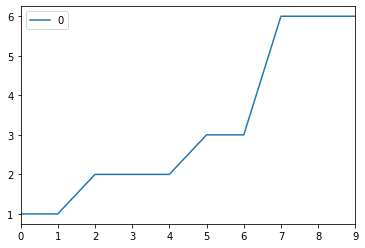

In [4]:
# your code here
dice_rolls.sort_values(by = 0).plot(use_index = False)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ba1fc90>]],
      dtype=object)

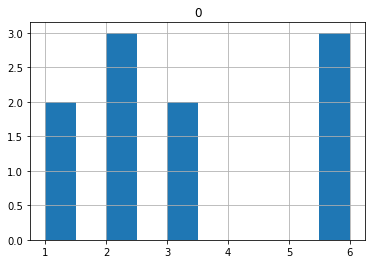

In [8]:
# your code here

#dice_rolls[0].value_counts().sort_values().hist(bins = 6)
dice_rolls.hist()

In [9]:
"""
While the first shows a cumulative progression of the value occurences as each throw occurs,
this one accumulates the information in a more sensible and understandable way (but 
essentially they provide the same information.)
"""

'\nWhile the first shows a cumulative progression of the value occurences as each throw occurs,\nthis one accumulates the information in a more sensible and understandable way (but \nessentially they provide the same information.)\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
# your code here
def i_am_mean(obs):
    return obs.sum() / obs.count()

i_am_mean(dice_rolls)

0    3.2
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
# your code here
# I'm unsure if this is right;
def another_mean(obs):
    freq = {}
    for i in obs:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1
            
    div = int()
    values = int()
    for k, v in freq.items():
        div += k * v
        values += v

    mean = div / values
    
    return mean

another_mean(dice_rolls[0])

3.2

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [12]:
# your code here
def i_am_median(obs):
    median = int()
    median_float = float()
    
    if len(obs) % 2 == 0:
        median_float = ((obs[len(obs) // 2] + obs[(len(obs) // 2) - 1]) / 2)
    else:
        median = obs[len(obs) // 2]
    
    if median == 0:
        return median_float
    else:
        return median

i_am_median(dice_rolls[0])

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [21]:
# your code here
def quartiles(obs):    
    data = sorted(obs)
    
    median = int()
    median_float = float()
    
    if len(obs) % 2 == 0:
        median_float = ((obs[len(obs) // 2] + obs[(len(obs) // 2) - 1]) / 2)
    else:
        median = obs[len(obs) // 2]
        
    q1 = data[len(data) // 4]
    
    if median == 0:
        q2 = median_float
    else:
        q2 = median
    
    q3 = data[-len(data) // 4]
    
    
    return q1, q2, q3

quartiles(dice_rolls[0])

(2, 2.5, 6)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

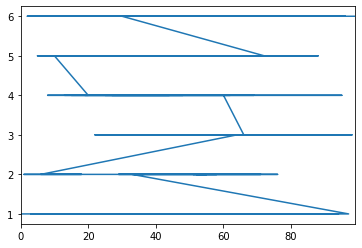

In [43]:
# your code here
# This?
data = pd.read_csv("../data/roll_the_dice_hundred.csv")

os.listdir("../data")

data_hist = data.sort_values(by = "value")

# This visualization makes no sense to me.
data_hist["value"].plot()

In [34]:
"""
If I'm interpreting this right, I see the distribuition of how many occurences each side
of the dice has had.
"""

"\nIf I'm interpreting this right, I see the distribuition of how many occurences each side\nof the dice has had.\n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [35]:
# your code here
i_am_median(data["value"])

2.5

#### 3.- Now, calculate the frequency distribution.


In [38]:
# your code here
# Is this what's being asked? or 
def just_freq(obs):
    freq = {}
    for i in obs:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1

    return freq

just_freq(data["value"])

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

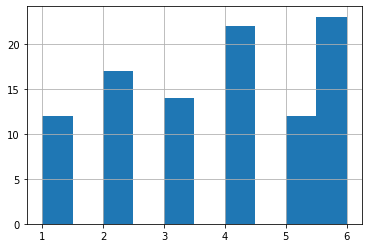

In [45]:
# your code here
data["value"].hist()

In [ ]:
"""
'If the histogram is skewed right, the mean is greater than the median.

If the histogram is close to symmetric, then the mean and median are close to each other.

If the histogram is skewed left, the mean is less than the median.'
(from: https://www.dummies.com/education/math/statistics/how-the-shape-of-a-histogram-reflects-the-statistical-mean-and-median/)

So.. The graph is somewhere between left-skewed and close to symmetric(?); And the mean
will be close to the median, although it will be less than the median(?).
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

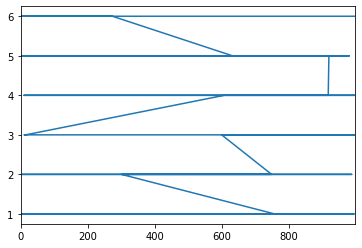

In [52]:
# your code here
thousand = pd.read_csv("../data/roll_the_dice_thousand.csv")

#os.listdir("../data")

thousand_sorted = thousand.sort_values(by = "value")

# This visualization makes no sense to me.
thousand_sorted["value"].plot()

In [ ]:
"""
I don't understand.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d1e0210>]],
      dtype=object)

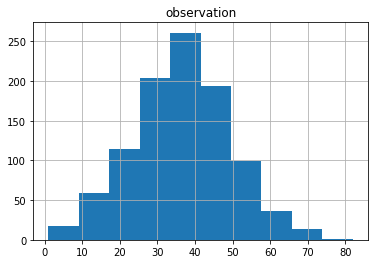

In [59]:
# your code here
ages_population = pd.read_csv("../data/ages_population.csv")

os.listdir("../data")

"""
I think the mean will be around 35. As for the Standard Deviation, I have no idea how to 
tell from the histogram. I don't know if this is a normal distribuition or not (I don't know
how to identify one), with which, maybe, I could say that the std with be around +-10?
"""

# I'll go back to the histogram or I won't understand
ages_population.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [64]:
# your code here
print(ages_population.mean(), ages_population.std())

observation    36.56
dtype: float64 observation    12.8165
dtype: float64


In [ ]:
"""
I guess its fairly close, so... right intuition or just lucky?
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d5d2b50>]],
      dtype=object)

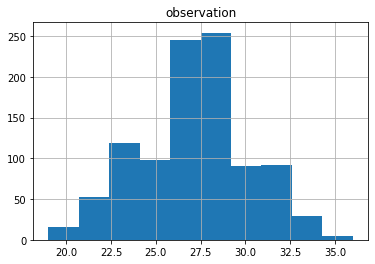

In [68]:
# your code here
ages_population = pd.read_csv("../data/ages_population2.csv")

#os.listdir("../data")

# Histogram
ages_population.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Well.. yes. This one is much more concentraded around 27.5 (0.5 ?!), and as a much smaller 
rangeof ages (between 20 and 35). Don't know if anything else.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [69]:
# your code here
print(ages_population.mean(), ages_population.std())

observation    27.155
dtype: float64 observation    2.969814
dtype: float64


In [ ]:
"""
I don't know what to think.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d6d2610>]],
      dtype=object)

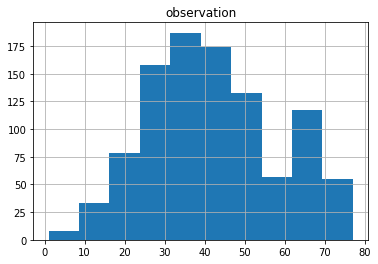

In [70]:
# your code here
ages_population = pd.read_csv("../data/ages_population3.csv")

#os.listdir("../data")

# Histogram
ages_population.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [73]:
# your code here
print(ages_population.mean(), ages_population.std())

observation    41.989
dtype: float64 observation    16.144706
dtype: float64


In [74]:
"""
This one is right-skewed(?), and has a larger std. Don't know what else.
"""

"\nThis one is right-skewed(?), and has a larger std. Don't know what else.\n"

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [78]:
# your code here
ages_population.quantile([0.25, 0.50, 0.75])

,observation
0.25,30.0
0.50,40.0
0.75,53.0


In [ ]:
"""
I am stumped as to what to say.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here
# n/a

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""